# Flight Delay Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('/Users/rohitsuvarna/Downloads/flights_train.csv',index_col= 0)
test_df = pd.read_csv('/Users/rohitsuvarna/Downloads/flights_test.csv',index_col= 0)
train_size = train_df.shape[0]
test_size = test_df.shape[0]

In [3]:
train_df

,DAY_OF_WEEK,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,AIRLINE_ID,FL_DATE,ORIGIN_CITY_MARKET_ID,...,FL_NUM,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,FIRST_DEP_TIME,ARR_DELAY
UID,,,,,,,,,,,,,,,,,,,,,
0,2,1020,11,8,373,"2,701",11,19930,2017-01-03,30559,...,879,AS,SEA,"Seattle, WA",WA,LIH,"Lihue, HI",HI,NaN,-11
1,6,1220,13,9,183,"1,171",5,19805,2017-01-28,33570,...,2491,AA,SAN,"San Diego, CA",CA,DFW,"Dallas/Fort Worth, TX",TX,NaN,1
2,6,945,48,6,355,"2,552",11,19930,2017-01-21,30299,...,172,AS,ANC,"Anchorage, AK",AK,PHX,"Phoenix, AZ",AZ,NaN,18
3,1,1437,17,8,136,967,4,19977,2017-01-23,32457,...,2030,UA,SFO,"San Francisco, CA",CA,DEN,"Denver, CO",CO,NaN,0
4,1,830,37,7,114,534,3,19393,2017-01-02,30397,...,3812,WN,ATL,"Atlanta, GA",GA,IAD,"Washington, DC",VA,NaN,197
5,7,1735,28,5,151,984,4,20366,2017-01-01,31453,...,4220,EV,IAH,"Houston, TX",TX,MKE,"Milwaukee, WI",WI,NaN,-17
6,4,1240,11,6,46,160,1,20304,2017-01-05,33785,...,3063,OO,YUM,"Yuma, AZ",AZ,PHX,"Phoenix, AZ",AZ,NaN,-15
7,1,710,10,4,75,337,2,20416,2017-01-02,32575,...,949,NK,LAX,"Los Angeles, CA",CA,OAK,"Oakland, CA",CA,NaN,-7
9,4,825,22,4,167,"1,250",6,20304,2017-01-05,34614,...,5677,OO,SLC,"Salt Lake City, UT",UT,ORD,"Chicago, IL",IL,NaN,478


In [4]:
train_df.columns

Index(['DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'AIRLINE_ID',
       'FL_DATE', 'ORIGIN_CITY_MARKET_ID', 'DEST_CITY_MARKET_ID', 'FL_NUM',
       'UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'FIRST_DEP_TIME',
       'ARR_DELAY'],
      dtype='object')

In [5]:
test_df

,DAY_OF_WEEK,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,AIRLINE_ID,FL_DATE,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,FL_NUM,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,FIRST_DEP_TIME
UID,,,,,,,,,,,,,,,,,,,,
8,3,2000,18,5,83,337,2,20304,2017-01-25,32575,32457,4926,OO,LAX,"Los Angeles, CA",CA,SFO,"San Francisco, CA",CA,NaN
15,2,1830,12,4,182,"1,476",6,19393,2017-01-10,32457,30423,336,WN,SJC,"San Jose, CA",CA,AUS,"Austin, TX",TX,NaN
29,2,1519,17,4,138,780,4,20366,2017-01-17,31703,30397,5146,EV,HPN,"White Plains, NY",NY,ATL,"Atlanta, GA",GA,NaN
33,1,940,10,2,116,773,4,19790,2017-01-09,33105,33195,1502,DL,CVG,"Cincinnati, OH",KY,TPA,"Tampa, FL",FL,NaN
65,6,1425,19,5,278,"2,419",10,21171,2017-01-07,32457,30852,90,VX,SFO,"San Francisco, CA",CA,IAD,"Washington, DC",VA,NaN
79,7,1800,11,6,60,239,1,19393,2017-01-08,30194,31453,2525,WN,DAL,"Dallas, TX",TX,HOU,"Houston, TX",TX,NaN
80,5,1145,18,3,166,954,4,19930,2017-01-27,32211,30666,649,AS,LAS,"Las Vegas, NV",NV,BLI,"Bellingham, WA",WA,NaN
84,5,1235,13,4,63,250,2,20304,2017-01-13,32457,30157,5966,OO,SFO,"San Francisco, CA",CA,ACV,"Arcata/Eureka, CA",CA,NaN
102,3,1950,9,4,43,148,1,19393,2017-01-04,31453,30423,1928,WN,HOU,"Houston, TX",TX,AUS,"Austin, TX",TX,NaN


# Feature Engineering

I want to make the following changes:
Change day of week to categorical variable 

Remove 'FIRST_DEP_TIME' as most of the values are NaNs

Remove all columns with City and state abbreviations and only keep the market_id information

Distance group is correlated with Distance so we remove it

In [6]:
train_df = train_df[['DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE','AIRLINE_ID',
       'FL_DATE', 'ORIGIN_CITY_MARKET_ID', 'DEST_CITY_MARKET_ID','ARR_DELAY']]
X = train_df[['DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE','AIRLINE_ID',
       'FL_DATE', 'ORIGIN_CITY_MARKET_ID', 'DEST_CITY_MARKET_ID']]
y_ = train_df['ARR_DELAY']
X_test = test_df[['DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE','AIRLINE_ID',
       'FL_DATE', 'ORIGIN_CITY_MARKET_ID', 'DEST_CITY_MARKET_ID']]
frames = [X,X_test]
X = pd.concat(frames)
X

,DAY_OF_WEEK,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,AIRLINE_ID,FL_DATE,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID
UID,,,,,,,,,,
0,2,1020,11,8,373,"2,701",19930,2017-01-03,30559,32982
1,6,1220,13,9,183,"1,171",19805,2017-01-28,33570,30194
2,6,945,48,6,355,"2,552",19930,2017-01-21,30299,30466
3,1,1437,17,8,136,967,19977,2017-01-23,32457,30325
4,1,830,37,7,114,534,19393,2017-01-02,30397,30852
5,7,1735,28,5,151,984,20366,2017-01-01,31453,33342
6,4,1240,11,6,46,160,20304,2017-01-05,33785,30466
7,1,710,10,4,75,337,20416,2017-01-02,32575,32457
9,4,825,22,4,167,"1,250",20304,2017-01-05,34614,30977


# Handling day of the week and date variables

We create 7 new categorical variables for each day of the week.

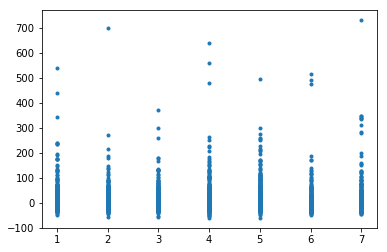

In [7]:
days = train_df["DAY_OF_WEEK"]
r = train_df['ARR_DELAY']

plt.plot(days,r,'.')
plt.show()

In [8]:
X = pd.concat([X,pd.get_dummies(X['DAY_OF_WEEK'], prefix='DAY_OF_WEEK')],axis=1)
#X_test = pd.concat([X_test,pd.get_dummies(X_test['DAY_OF_WEEK'], prefix='DAY_OF_WEEK')],axis=1)

X = X.drop('DAY_OF_WEEK',1)
X['DISTANCE'] = X['DISTANCE'].str.replace(',', '')
X['DISTANCE'] = X.DISTANCE.apply(lambda x: float(x))
X

,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,AIRLINE_ID,FL_DATE,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
UID,,,,,,,,,,,,,,,,
0,1020,11,8,373,2701.0,19930,2017-01-03,30559,32982,0,1,0,0,0,0,0
1,1220,13,9,183,1171.0,19805,2017-01-28,33570,30194,0,0,0,0,0,1,0
2,945,48,6,355,2552.0,19930,2017-01-21,30299,30466,0,0,0,0,0,1,0
3,1437,17,8,136,967.0,19977,2017-01-23,32457,30325,1,0,0,0,0,0,0
4,830,37,7,114,534.0,19393,2017-01-02,30397,30852,1,0,0,0,0,0,0
5,1735,28,5,151,984.0,20366,2017-01-01,31453,33342,0,0,0,0,0,0,1
6,1240,11,6,46,160.0,20304,2017-01-05,33785,30466,0,0,0,1,0,0,0
7,710,10,4,75,337.0,20416,2017-01-02,32575,32457,1,0,0,0,0,0,0
9,825,22,4,167,1250.0,20304,2017-01-05,34614,30977,0,0,0,1,0,0,0


In [9]:
X['month'] = X.FL_DATE.apply(lambda x: int(str(x)[5:7]))
X = X.drop('FL_DATE',1)
X = pd.concat([X,pd.get_dummies(X['month'], prefix='month')],axis=1)
X = X.drop('month',1)
X

,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,AIRLINE_ID,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,DAY_OF_WEEK_1,DAY_OF_WEEK_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
UID,,,,,,,,,,,,,,,,,,,,,
0,1020,11,8,373,2701.0,19930,30559,32982,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1220,13,9,183,1171.0,19805,33570,30194,0,0,...,0,0,0,0,0,0,0,0,0,0
2,945,48,6,355,2552.0,19930,30299,30466,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1437,17,8,136,967.0,19977,32457,30325,1,0,...,0,0,0,0,0,0,0,0,0,0
4,830,37,7,114,534.0,19393,30397,30852,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1735,28,5,151,984.0,20366,31453,33342,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1240,11,6,46,160.0,20304,33785,30466,0,0,...,0,0,0,0,0,0,0,0,0,0
7,710,10,4,75,337.0,20416,32575,32457,1,0,...,0,0,0,0,0,0,0,0,0,0
9,825,22,4,167,1250.0,20304,34614,30977,0,0,...,0,0,0,0,0,0,0,0,0,0


# Handling Departure Time and Airline ID as categorical variable

In [10]:
X= X.assign(CRS_DEP_TIME_fixed=pd.to_datetime(X.CRS_DEP_TIME, format='%H%M').dt.time)
X = X.drop('CRS_DEP_TIME',1)
X['dep_hour'] = X.CRS_DEP_TIME_fixed.apply(lambda x: x.hour)
X = X.drop('CRS_DEP_TIME_fixed',1)
X= pd.concat([X,pd.get_dummies(X['dep_hour'], prefix='dep_hour')],axis=1)
X = pd.concat([X,pd.get_dummies(X['AIRLINE_ID'], prefix='AIRLINE_ID')],axis=1)
X = X.drop('AIRLINE_ID',1)
X




,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,...,AIRLINE_ID_19790,AIRLINE_ID_19805,AIRLINE_ID_19930,AIRLINE_ID_19977,AIRLINE_ID_20304,AIRLINE_ID_20366,AIRLINE_ID_20409,AIRLINE_ID_20416,AIRLINE_ID_20436,AIRLINE_ID_21171
UID,,,,,,,,,,,,,,,,,,,,,
0,11,8,373,2701.0,30559,32982,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,13,9,183,1171.0,33570,30194,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,48,6,355,2552.0,30299,30466,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,17,8,136,967.0,32457,30325,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,37,7,114,534.0,30397,30852,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,28,5,151,984.0,31453,33342,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,11,6,46,160.0,33785,30466,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,10,4,75,337.0,32575,32457,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,22,4,167,1250.0,34614,30977,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [11]:
X.columns

Index(['TAXI_OUT', 'TAXI_IN', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'ORIGIN_CITY_MARKET_ID', 'DEST_CITY_MARKET_ID', 'DAY_OF_WEEK_1',
       'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5',
       'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dep_hour', 'dep_hour_1',
       'dep_hour_2', 'dep_hour_3', 'dep_hour_4', 'dep_hour_5', 'dep_hour_6',
       'dep_hour_7', 'dep_hour_8', 'dep_hour_9', 'dep_hour_10', 'dep_hour_11',
       'dep_hour_12', 'dep_hour_13', 'dep_hour_14', 'dep_hour_15',
       'dep_hour_16', 'dep_hour_17', 'dep_hour_18', 'dep_hour_19',
       'dep_hour_20', 'dep_hour_21', 'dep_hour_22', 'dep_hour_23',
       'AIRLINE_ID_19393', 'AIRLINE_ID_19690', 'AIRLINE_ID_19790',
       'AIRLINE_ID_19805', 'AIRLINE_ID_19930', 'AIRLINE_ID_19977',
       'AIRLINE_ID_20304', 'AIRLINE_ID_20366', 'AIRLINE_ID_20409',
       'AIRLIN

# Dropping the Market_ids

In [12]:
X = X.drop('ORIGIN_CITY_MARKET_ID',1)
X = X.drop('DEST_CITY_MARKET_ID',1)
X

,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,...,AIRLINE_ID_19790,AIRLINE_ID_19805,AIRLINE_ID_19930,AIRLINE_ID_19977,AIRLINE_ID_20304,AIRLINE_ID_20366,AIRLINE_ID_20409,AIRLINE_ID_20416,AIRLINE_ID_20436,AIRLINE_ID_21171
UID,,,,,,,,,,,,,,,,,,,,,
0,11,8,373,2701.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,13,9,183,1171.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,48,6,355,2552.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,17,8,136,967.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,37,7,114,534.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,28,5,151,984.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,11,6,46,160.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,10,4,75,337.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,22,4,167,1250.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
X.columns

Index(['TAXI_OUT', 'TAXI_IN', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4',
       'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'dep_hour', 'dep_hour_1',
       'dep_hour_2', 'dep_hour_3', 'dep_hour_4', 'dep_hour_5', 'dep_hour_6',
       'dep_hour_7', 'dep_hour_8', 'dep_hour_9', 'dep_hour_10', 'dep_hour_11',
       'dep_hour_12', 'dep_hour_13', 'dep_hour_14', 'dep_hour_15',
       'dep_hour_16', 'dep_hour_17', 'dep_hour_18', 'dep_hour_19',
       'dep_hour_20', 'dep_hour_21', 'dep_hour_22', 'dep_hour_23',
       'AIRLINE_ID_19393', 'AIRLINE_ID_19690', 'AIRLINE_ID_19790',
       'AIRLINE_ID_19805', 'AIRLINE_ID_19930', 'AIRLINE_ID_19977',
       'AIRLINE_ID_20304', 'AIRLINE_ID_20366', 'AIRLINE_ID_20409',
       'AIRLINE_ID_20416', 'AIRLINE_ID_20436', 'AIRLINE_ID_21171'],
 

# Algorithm 1: Linear Regression

In [14]:
X_train = X[:train_size]
X_test_set = X[train_size:]
X_test_set

,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,DISTANCE,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,...,AIRLINE_ID_19790,AIRLINE_ID_19805,AIRLINE_ID_19930,AIRLINE_ID_19977,AIRLINE_ID_20304,AIRLINE_ID_20366,AIRLINE_ID_20409,AIRLINE_ID_20416,AIRLINE_ID_20436,AIRLINE_ID_21171
UID,,,,,,,,,,,,,,,,,,,,,
8,18,5,83,337.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,12,4,182,1476.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,17,4,138,780.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33,10,2,116,773.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
65,19,5,278,2419.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
79,11,6,60,239.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,18,3,166,954.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
84,13,4,63,250.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
102,9,4,43,148.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = X_train.as_matrix()
y = y_.as_matrix()

# Modify df here

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2,random_state = 0)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

predictions

array([ -3.11901553e+00,  -2.58819172e+01,   1.15189497e+01,
         2.85434091e+01,  -1.18484361e+01,   9.62673551e+00,
         1.53205155e+00,   2.48066229e+01,   7.41158042e+00,
        -1.14011255e+01,   1.16893953e+01,   1.38378866e+01,
         3.68618495e+00,  -1.40306442e+01,  -9.70904342e+00,
         1.71313495e+00,   1.15306464e+01,   6.12404433e+00,
        -2.82123628e-01,  -3.58132939e+00,   9.97767886e+00,
        -6.08517645e+00,   2.76137113e+00,   1.25760607e+01,
         8.96704550e+00,  -5.78660661e+00,  -1.14674847e+01,
        -5.01489620e+00,   1.05842423e+01,  -2.88996090e+00,
        -2.68916699e+00,  -1.53403000e+00,   2.36830947e+00,
         2.42828481e+00,   7.02770340e+00,   6.85273871e+00,
         2.42368032e+01,  -1.67972065e+01,  -8.51787908e+00,
         3.09083294e+00,  -2.76294905e+00,   1.55334958e+01,
         2.38380159e-02,   2.09308761e+01,   5.03845771e+00,
        -7.70760397e+00,   2.42021859e+00,   9.77177565e+00,
        -3.27934008e+00,

In [17]:
error = mean_squared_error(y_test,predictions)
error

1656.1230477545175

# Linear Regression with Cross_val

In [18]:
lm1 =  linear_model.LinearRegression()

In [19]:
from sklearn.model_selection import GridSearchCV
scores = cross_val_score(lm1, df, y, cv=5, scoring='neg_mean_squared_error')
print("Mean squared error: {}".format(-1 * scores.mean()))

Mean squared error: 1950.8517910935836


In [20]:
param_grid_lm = { 
    'fit_intercept': [True, False],
    'normalize':  [True, False],
}
CV_lr = GridSearchCV(estimator=lm1, param_grid=param_grid_lm,scoring='neg_mean_squared_error', cv= 5)
CV_lr.fit(df,y)



GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [21]:
CV_lr.grid_scores_

/Users/rohitsuvarna/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -1759870039961751229383901867671552.00000, std: 3456855972905165511353905518215168.00000, params: {'fit_intercept': True, 'normalize': True},
 mean: -1950.81806, std: 157.01481, params: {'fit_intercept': True, 'normalize': False},
 mean: -1981.70523, std: 145.47002, params: {'fit_intercept': False, 'normalize': True},
 mean: -1981.70523, std: 145.47002, params: {'fit_intercept': False, 'normalize': False}]

# Random Forest

In [22]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

pred_rf = regr.predict(X_test)

mse_rf = mean_squared_error(y_test,pred_rf)

mse_rf

1681.3487173683504

# Random Forest with GridSearch to find best parameters(Using cross_val)

In [23]:

regr = RandomForestRegressor(random_state=1)
param_grid = { 
    'n_estimators': [200,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None],
    'min_samples_split': [50,60]
}

CV_rfc = GridSearchCV(estimator=regr, param_grid=param_grid,scoring='neg_mean_squared_error', cv= 5)

CV_rfc.fit(df, y)



GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None], 'min_samples_split': [50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
CV_rfc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 50,
 'n_estimators': 400}

In [25]:
CV_rfc.grid_scores_

/Users/rohitsuvarna/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -1979.86646, std: 186.57203, params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 50, 'n_estimators': 200},
 mean: -1979.20876, std: 184.88627, params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 50, 'n_estimators': 400},
 mean: -1976.38666, std: 184.18578, params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 60, 'n_estimators': 200},
 mean: -1977.05530, std: 182.67172, params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 60, 'n_estimators': 400},
 mean: -1956.89393, std: 164.14949, params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 200},
 mean: -1956.69889, std: 161.36567, params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 400},
 mean: -1961.70842, std: 158.81857, params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 60, 'n_estimators': 200},
 mean: -1957.58252, std: 159.37965, params: {'max_depth

In [26]:
CV_rfc.best_score_

-1956.698888206254

# Random Forest Predictor based on best params

In [27]:
regr1 = RandomForestRegressor(n_estimators= 400,max_features= 'sqrt',min_samples_split= 50 ,random_state=0)
regr1.fit(df,y)
pred_rf_final = regr1.predict(X_test_set)
pred_rf_final.shape

(484,)

In [28]:
pred_rf_final

array([  3.08593244e+00,   8.50063007e+00,   8.31128565e-01,
        -2.52311596e+00,   5.79089475e+00,   6.57500865e+00,
         2.66074917e-01,   4.47902945e+00,   4.95970559e+00,
        -7.19417670e+00,   2.31013508e-01,   3.22825261e+00,
        -4.85990607e-01,   2.13287497e+01,   1.10156144e+01,
        -5.70831715e-01,   1.37245924e+00,   5.32612850e+00,
         1.41970198e-01,   8.56145523e+00,  -2.15207756e+00,
         5.22820838e+00,   1.37221934e+00,   2.13327957e+01,
        -6.74613288e+00,   1.37560976e+01,   2.39317058e+00,
         1.06623673e+01,  -3.50825270e+00,   7.23972358e+00,
         1.11255110e+01,  -2.12119733e+00,   4.39036613e+00,
         1.05851586e+01,   9.28727062e+00,   2.06023532e+00,
        -3.00832784e-01,   5.27773866e-01,   3.49871780e+00,
        -6.74060340e+00,   9.80855797e+00,  -2.64802772e-01,
         2.31533763e+01,  -3.97016260e+00,   4.72514294e+00,
        -1.35007171e+00,   6.09531213e+00,   2.90155569e+00,
        -4.32075072e+00,

# Distribution of final predicted delay times.

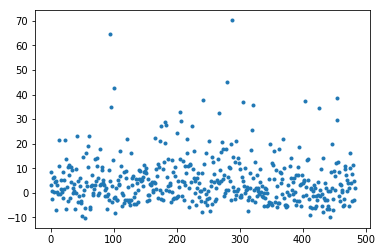

In [29]:
plt.plot(pred_rf_final,'.')
plt.show()


In [30]:
df_final = pd.DataFrame(index = X_test_set.index)
df_final['delay'] = pred_rf_final
df_final.to_csv('test outputs.csv')



In [31]:
sum(pred_rf_final)

2403.5221727349303